# **Hola.**
### Este es un programa de prueba para la lectura de un archivo .csv

In [1]:
pip install yfinance


     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
^C


In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
import pandas as pnd
import yfinance as yf
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [ ]:
#df = yf.download('BTC-USD', period = '6mo')
#df = yf.download('BTC-USD', start = '2017-08-01', end = '2021-12-27')
df = yf.download('BTC-USD', period = '1mo', interval = '5m')
df.to_csv("df1.csv")

In [ ]:
#@title Información preliminar del df.
# Lo básico
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#@title Descripción un poco mas detallada del df.
#Error porque es un DF.
df.DESCR

In [ ]:
#@title Tamaño del DF.
df.shape

(8900, 6)

In [ ]:
# Esto es para importar la librería que separa el DF.
from sklearn.model_selection import train_test_split

In [ ]:
x_multiple = df.iloc[:,[1,2,3]]
y_multiple = df.loc[:,['Close']]
#x_multiple
#y_multiple

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_multiple,y_multiple,test_size=0.2)

In [ ]:
df["y_test"] = y_test

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,y_test
Datetime,,,,,,,
2021-12-03 13:10:00+00:00,56965.468750,56965.468750,56947.550781,56954.523438,56954.523438,0,NaN
2021-12-03 13:15:00+00:00,56962.890625,56989.000000,56936.027344,56989.000000,56989.000000,36884480,NaN
2021-12-03 13:20:00+00:00,56970.972656,56973.066406,56959.734375,56970.238281,56970.238281,0,NaN
2021-12-03 13:25:00+00:00,56964.375000,57002.085938,56964.375000,56986.195312,56986.195312,0,NaN
2021-12-03 13:30:00+00:00,57004.367188,57482.167969,57004.367188,57482.167969,57482.167969,370429952,57482.167969
...,...,...,...,...,...,...,...
2022-01-03 12:50:00+00:00,47283.406250,47283.406250,47261.062500,47261.062500,47261.062500,0,NaN
2022-01-03 12:55:00+00:00,47262.273438,47262.273438,47243.093750,47243.093750,47243.093750,17547264,NaN
2022-01-03 13:00:00+00:00,47237.953125,47275.902344,47237.953125,47275.902344,47275.902344,20103168,47275.902344


In [ ]:
x_train

In [ ]:
#@title Definición del modelo a usar.
lrm = linear_model.LinearRegression()

In [ ]:
lrm.fit(x_train,y_train)

In [ ]:
y_pred = lrm.predict(x_test)
y_pred

array([[47583.6484375 ],
       [47803.03125   ],
       [47975.68359375],
       ...,
       [47736.953125  ],
       [48936.71484375],
       [50464.48828125]])

In [ ]:
y_test["y_pred"] = y_pred
y_test["Diferencia"] = y_test["y_pred"] - y_test["Close"]

In [ ]:
y_test

,Close,y_pred,Diferencia
Datetime,,,
2022-01-02 01:05:00+00:00,47583.648438,47583.648437,-7.275958e-12
2021-12-29 01:00:00+00:00,47803.031250,47803.031250,-7.275958e-12
2021-12-29 06:20:00+00:00,47975.683594,47975.683594,-7.275958e-12
2021-12-12 06:50:00+00:00,49171.875000,49171.875000,0.000000e+00
2021-12-25 23:35:00+00:00,50627.515625,50627.515625,0.000000e+00
...,...,...,...
2021-12-25 00:40:00+00:00,50984.882812,50984.882812,0.000000e+00
2021-12-13 06:30:00+00:00,49061.980469,49061.980469,-7.275958e-12
2021-12-17 02:10:00+00:00,47736.953125,47736.953125,-7.275958e-12


In [ ]:
df.head() # Muestra las primeras filas.

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-12-02 17:35:00+00:00,56628.167969,56628.167969,56526.175781,56609.628906,56609.628906,0
2021-12-02 17:40:00+00:00,56609.421875,56641.949219,56595.617188,56595.617188,56595.617188,14780416
2021-12-02 17:45:00+00:00,56575.222656,56620.308594,56571.113281,56620.308594,56620.308594,0
2021-12-02 17:50:00+00:00,56598.078125,56609.511719,56586.824219,56586.824219,56586.824219,1955840
2021-12-02 17:55:00+00:00,56573.875000,56660.261719,56573.875000,56594.921875,56594.921875,0


In [ ]:
#@title Creo una función.
# Cálculo de un promedio imaginario.
import random
def calcular_promedio(close):
  promedio = close / random.randint(1,100)
  return promedio

df["Promedios"] = df["Close"].apply(calcular_promedio)
df["Otra_Cosa"] = df["Close"] * 5
df.head()


,Open,High,Low,Close,Adj Close,Volume,Promedios,Otra_Cosa
Datetime,,,,,,,,
2021-12-02 17:35:00+00:00,56628.167969,56628.167969,56526.175781,56609.628906,56609.628906,0,1380.722656,283048.144531
2021-12-02 17:40:00+00:00,56609.421875,56641.949219,56595.617188,56595.617188,56595.617188,14780416,2460.679008,282978.085938
2021-12-02 17:45:00+00:00,56575.222656,56620.308594,56571.113281,56620.308594,56620.308594,0,786.393175,283101.542969
2021-12-02 17:50:00+00:00,56598.078125,56609.511719,56586.824219,56586.824219,56586.824219,1955840,608.460475,282934.121094
2021-12-02 17:55:00+00:00,56573.875000,56660.261719,56573.875000,56594.921875,56594.921875,0,943.248698,282974.609375


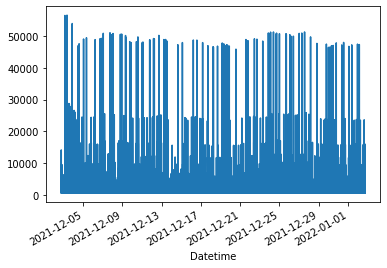

In [ ]:
#@title Función para dibujar.
# El eje X es Datetime. El Y es "Promedios"
df["Promedios"].plot()
plt.show()

In [ ]:
#@title Función para dibujar. Barras
# El eje X es Datetime. El Y es "Promedios".
# OJO que acá se bloquea por ser serie de tiempo.
df["Promedios"].plot(kind="bar")
plt.show()

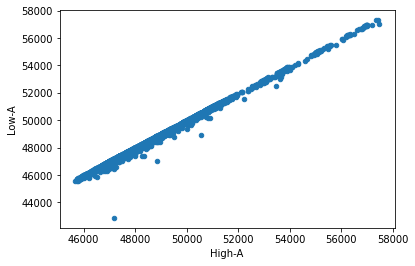

In [ ]:
#@title Función para dibujar. Dos variables.
# El eje X es Datetime. El Y es "Promedios".
# OJO que acá se bloquea por ser serie de tiempo.
df.plot(kind="scatter", x="High", y="Low")
plt.xlabel('High-A')
plt.ylabel('Low-A')
plt.show()

In [ ]:
df.to_csv("df.csv")